In [52]:
import numpy as np
import pandas as pd

input_file = "./../train.csv"

# comma delimited is the default
passengers = pd.read_csv(input_file, header = 0)

passengers['Sex'] = passengers \
    .apply(lambda row: row['Sex'] == 'female', axis=1).astype(int)

passengers['Parch'] = passengers \
    .apply(lambda row: row['Parch'] > 0, axis=1).astype(int)

passengers['Age'] = passengers['Age'].fillna(passengers['Age'].mean())
    
# passengers['Age'] = passengers.groupby(['Pclass', 'Sex', 'Parch'])['Age'] \
#     .apply(lambda x: x.fillna(x.median()))

pd.DataFrame.head(passengers, 10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,1,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,C


In [33]:
from sklearn.tree import DecisionTreeClassifier

X = passengers[['Pclass', 'Sex', 'Parch', 'SibSp']]
y = passengers['Survived']

tree_clf = DecisionTreeClassifier(min_samples_leaf = 4, max_depth = 6)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file = 'survivor.dot',
    feature_names = ['Pclass', 'Sex', 'Parch', 'Age'],
    class_names = ['Perished', 'Survived'],
    rounded = True,
    filled = True
)

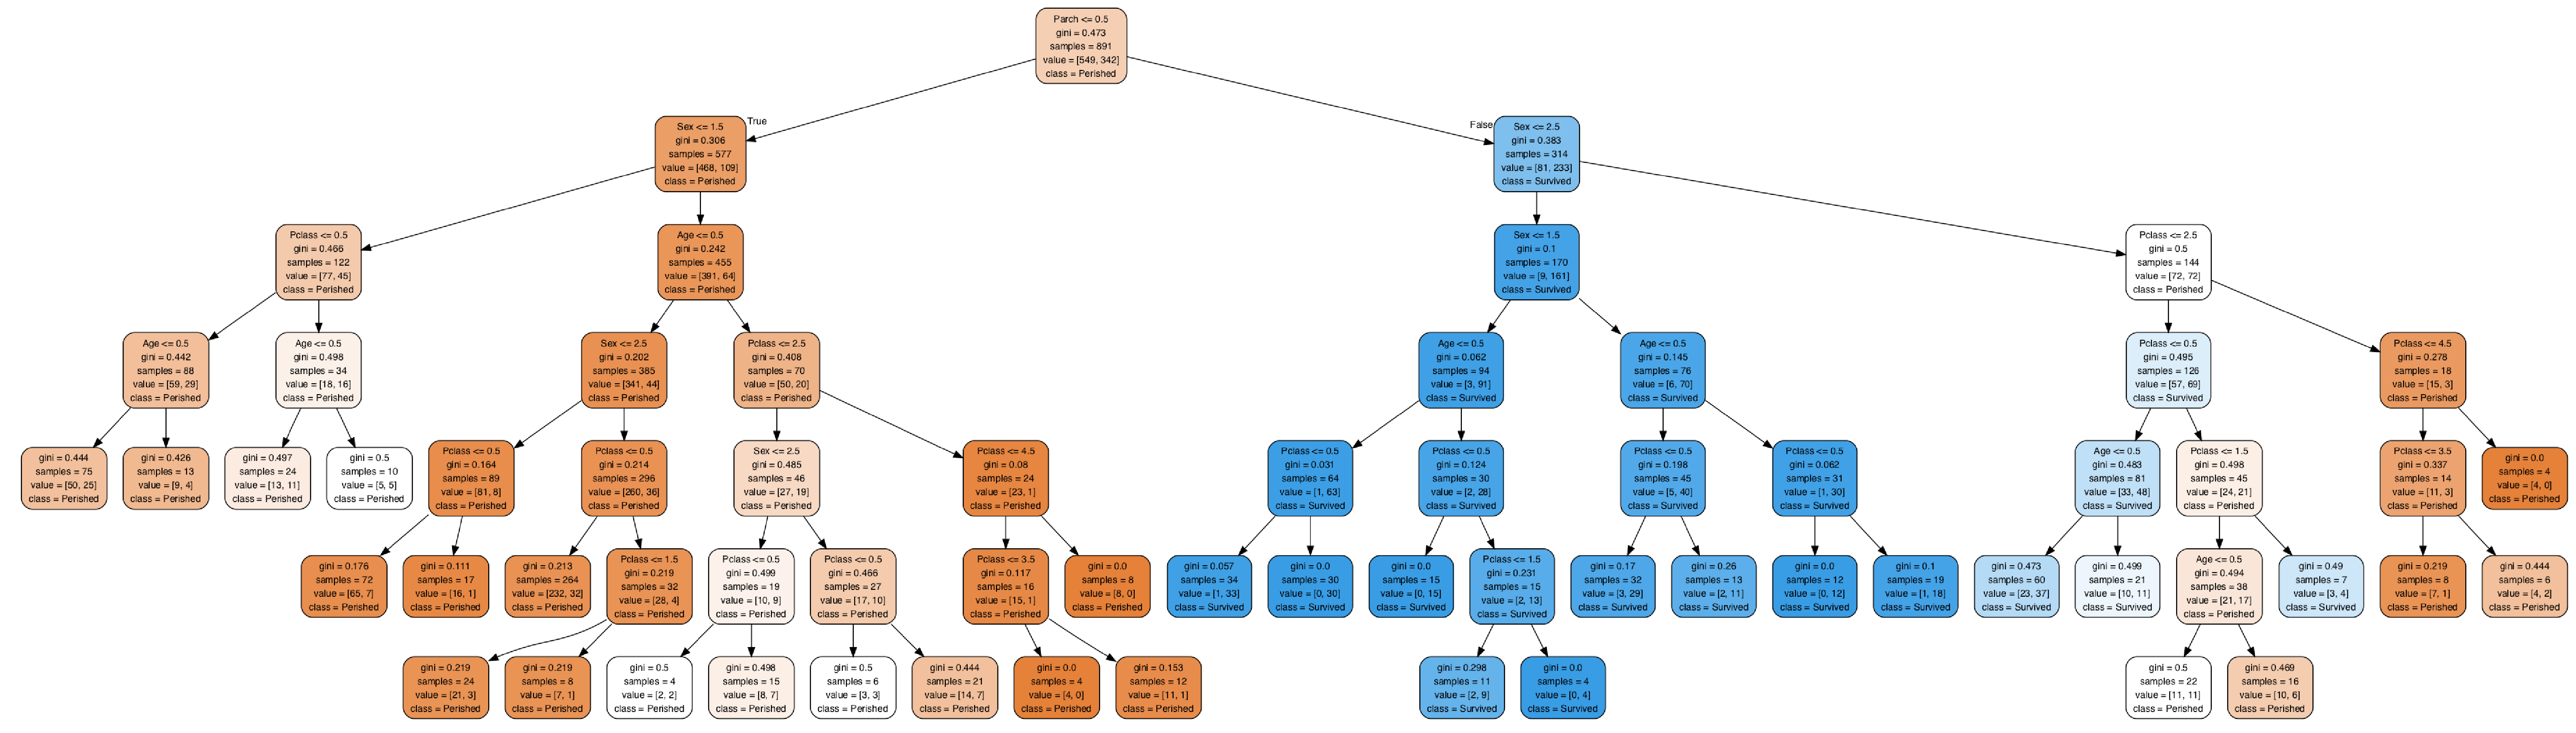

In [35]:
from io import StringIO
from sklearn import tree

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#from graphviz import *

import matplotlib.image as mpimg
import pydotplus

classifier = tree_clf
dotfile = open("survivor.dot", 'w')
tree.export_graphviz(
    classifier,
    out_file = dotfile,
    feature_names = ['Pclass', 'Sex', 'Parch', 'Age'],
    class_names = ['Perished', 'Survived'],
    rounded = True,
    filled = True
)
dotfile.close()
dot_data = StringIO()
tree.export_graphviz(
    classifier,
    out_file = dot_data,
    feature_names = ['Pclass', 'Sex', 'Parch', 'Age'],
    class_names = ['Perished', 'Survived'],
    rounded = True,
    filled = True
)
graph = pydotplus.graph_from_dot_file("survivor.dot")
graph.write_png('survivor.png')
img = mpimg.imread('survivor.png')
fig = plt.figure(figsize=(100, 100)) 
plt.axis("off")
plt.imshow(img, cmap = plt.cm.binary, interpolation="nearest")
plt.show()

In [36]:
input_test_file = "./../test.csv"


# comma delimited is the default
test_passengers = pd.read_csv(input_test_file, header = 0)

test_passengers['Sex'] = test_passengers \
    .apply(lambda row: row['Sex'] == 'female', axis = 1).astype(int)

test_passengers['Parch'] = test_passengers \
    .apply(lambda row: row['Parch'] > 0, axis=1).astype(int)
    
test_passengers['Age'] = test_passengers.groupby(['Pclass', 'Sex', 'Parch'])['Age'] \
    .apply(lambda x: x.fillna(x.median()))

pd.DataFrame.head(test_passengers, 10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S


In [37]:
tree_clf.predict_proba(test_passengers[['Pclass', 'Sex', 'Parch', 'Age']])[:10]

array([[ 0.875     ,  0.125     ],
       [ 1.        ,  0.        ],
       [ 0.94117647,  0.05882353],
       [ 0.875     ,  0.125     ],
       [ 1.        ,  0.        ],
       [ 0.875     ,  0.125     ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.875     ,  0.125     ]])

In [38]:
test_passengers['Survived'] = tree_clf \
    .predict(test_passengers[['Pclass', 'Sex', 'Parch', 'Age']])

In [39]:
test_passengers[['PassengerId', 'Survived']] \
    .to_csv('test_(Pclass_Sex_Parch_Age)_results.csv', sep=',', index = False, encoding='utf-8')
pd.DataFrame.head(test_passengers)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0
